## LetsGrowMore -Task 1

### Iris Flowers Classification ML Project

### Import Packages

In [1]:
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np        # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns


### Data Read

In [2]:
data=pd.read_csv("C:/Users/Bismi Joseph/Documents/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 6)

### Checking for Missing Values

In [7]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking for duplicate values

In [9]:
data.duplicated().sum()

0

In [10]:
#### Check for value counts of target variable

In [11]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## EDA

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [13]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
col = ['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm']

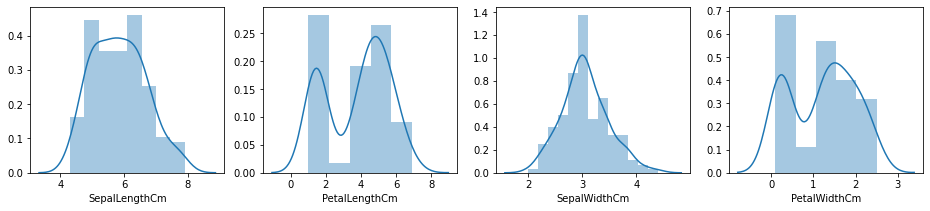

In [15]:
plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(data[i])
    k=k+1
plt.show()

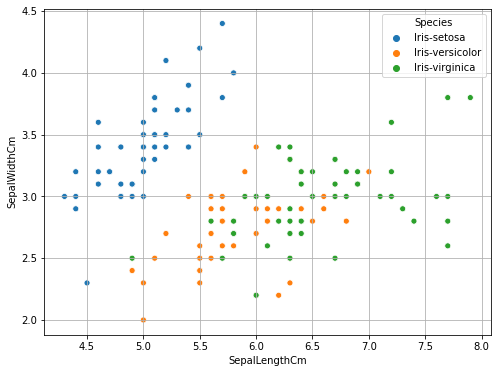

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species',data=data)
plt.grid(True)
plt.show()

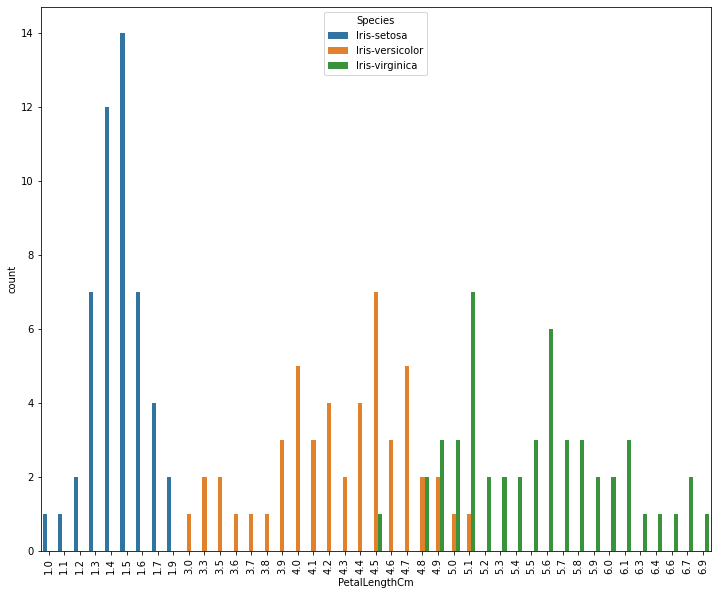

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(x='PetalLengthCm',hue='Species',data=data)
plt.xticks(rotation=90)
plt.show()

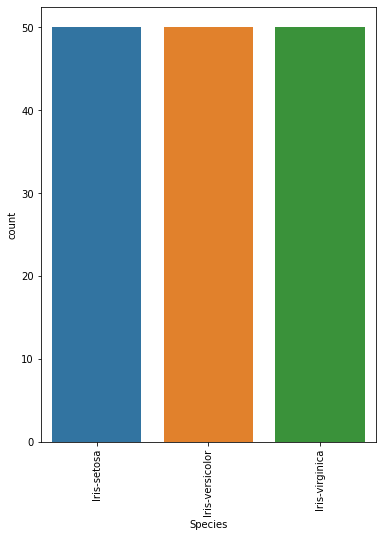

In [18]:
plt.figure(figsize=(6,8))
sns.countplot(x='Species',data=data)
plt.xticks(rotation=90)
plt.show()

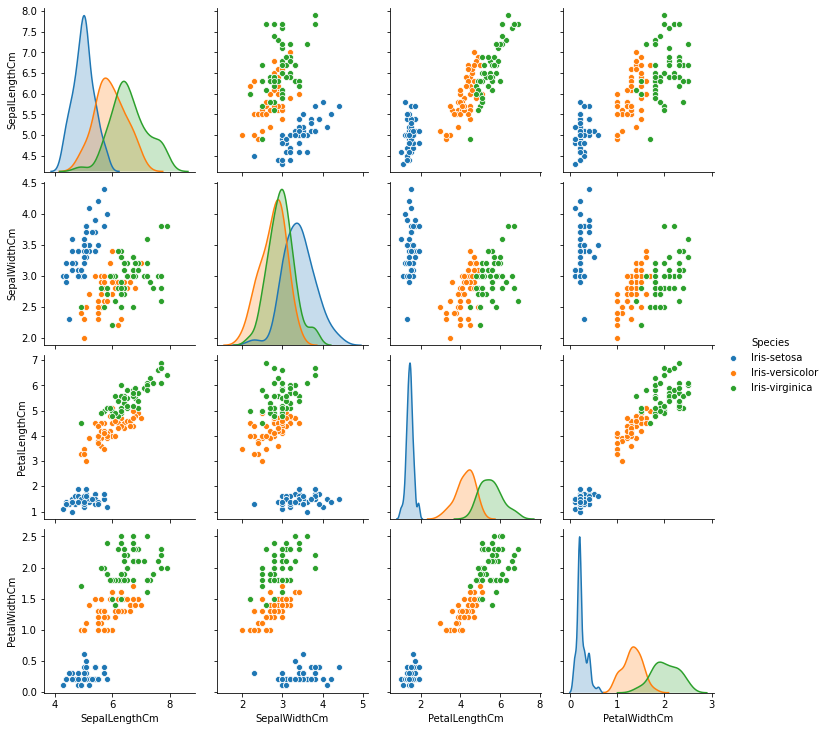

In [19]:
col1 = data.drop('Id', axis=1)


sns.pairplot(col1,hue='Species')

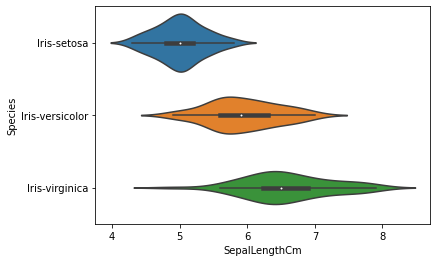

In [20]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data)

Text(0.5, 1.0, 'PEARSON CORRELATION')

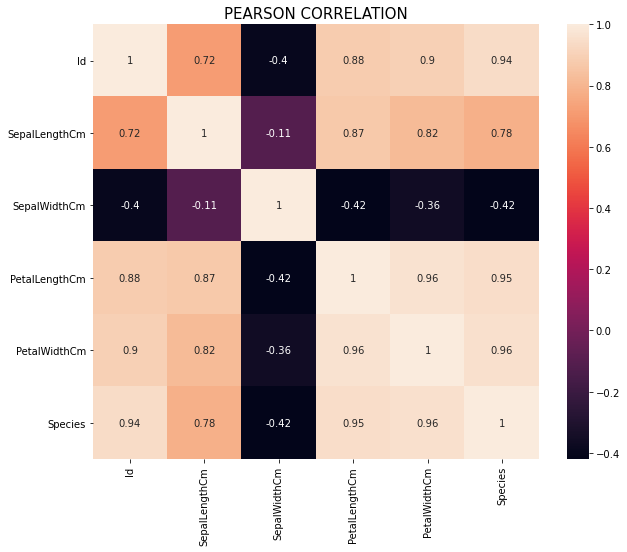

In [48]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(method="pearson"),annot=True)
plt.title('PEARSON CORRELATION', fontsize=15)

## Encoding

In [22]:
import sklearn.preprocessing as pre

In [23]:
le=pre.LabelEncoder()

In [24]:

    data['Species']=le.fit_transform(data['Species'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [26]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## Modeling part

In [27]:
import sklearn.model_selection as ms

In [28]:
Features,outcomes=data.drop('Species',axis=1),data['Species']

In [29]:
x_train,x_test,y_train,y_test=ms.train_test_split(Features,outcomes,test_size=0.3,random_state=1234567)

## K-nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN_cls=KNeighborsClassifier(n_neighbors=5)

In [32]:
KNN_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
KNN_cls.score(x_test,y_test)

1.0

In [34]:
KNN_cls.score(x_train,y_train)

1.0

In [35]:
import sklearn.metrics as mt

In [36]:
mt.confusion_matrix(y_test,KNN_cls.predict(x_test))

array([[17,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 12]], dtype=int64)

In [37]:
print(mt.classification_report(y_test,KNN_cls.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Decision tree

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [39]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [40]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
y_pred_DT = dtc.predict(x_test)

In [42]:
Acc_DT = accuracy_score(y_test,y_pred_DT).round(4)
Acc_DT

1.0

In [43]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

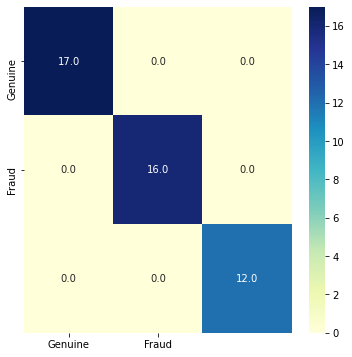

In [44]:
plt.figure(figsize = (6,6))
sns.heatmap(cm_DT,annot = True, fmt = ".1f",cmap='YlGnBu',
            xticklabels = ["Genuine","Fraud"],yticklabels = ["Genuine","Fraud"])